In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



Import train/test dats from pickle file

In [14]:
import pickle

# Load the training and testing split from the pickle file
with open('../data/train_test_data.pickle', 'rb') as file:
    train_test_split = pickle.load(file)


X_train_raw = train_test_split['X_train_raw']
y_train_raw = train_test_split['y_train_raw']
X_test_raw = train_test_split['X_test_raw']
y_test_raw = train_test_split['y_test_raw']


Load the different splits

In [15]:
with open('../data/train_splits.pickle', 'rb') as file:
    split_data = pickle.load(file)

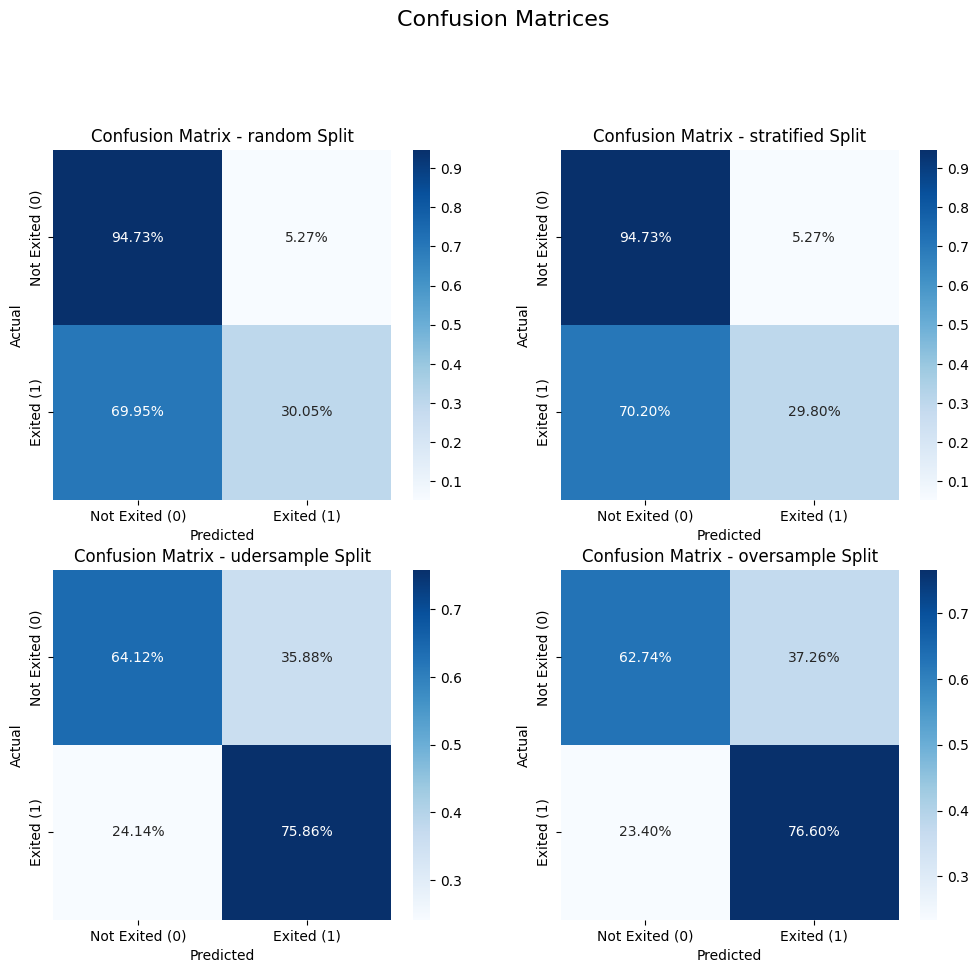

<Figure size 800x600 with 0 Axes>

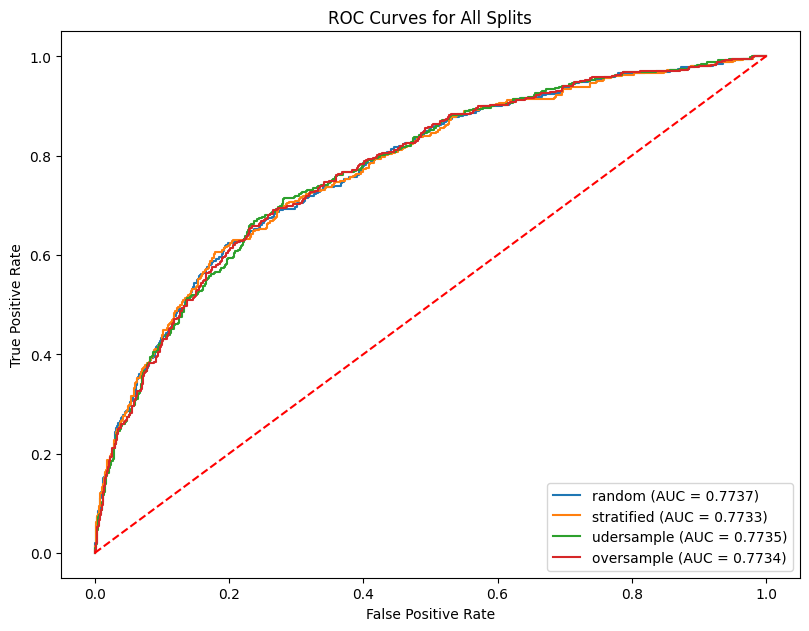

random- Validation Accuracy: 0.8069, Test Accuracy: 0.8160 
stratified- Validation Accuracy: 0.8175, Test Accuracy: 0.8155 
udersample- Validation Accuracy: 0.6987, Test Accuracy: 0.6650 
oversample- Validation Accuracy: 0.6994, Test Accuracy: 0.6555 


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


#Baseline is a Logistic Regression model
model = LogisticRegression()

#We will store our performance results in a dictionary 
performance = {}

# Train and evaluate the model on each split 


#Create a 2x2 grid for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
plt.figure(figsize=(8,6))

#ROC curve figure 
plt.figure(figsize=(8,6))


for idx, split in enumerate(split_data):

    #Define sets 
    X_train, X_val, y_train, y_val = split_data[split]

    model.fit(X_train,y_train)

    # Predict on validation set (optional, you can validate performance on training)
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)


    # Predict on the unseen test set
    y_test_pred = model.predict(X_test_raw)
    test_accuracy = accuracy_score(y_test_raw, y_test_pred)

    #Define performance metrics 
    performance[split] = {
        'val_accuracy': val_accuracy, 
        'test_accuracy': test_accuracy 
    }

    #Plot the confusion matrix for the teset set 
    conf_matrix = confusion_matrix(y_test_raw, y_test_pred)
    #Normalize the confusion matrix by the number of true samples per class
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[idx],
                xticklabels=['Not Exited (0)', 'Exited (1)'],
                yticklabels=['Not Exited (0)', 'Exited (1)'])
    axes[idx].set_title(f'Confusion Matrix - {split} Split')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')


    #Plot ROC curve on the same figure for all splits
    y_test_pred_prob = model.predict_proba(X_test_raw)[:, 1]  # Get predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test_raw, y_test_pred_prob)
    roc_auc = roc_auc_score(y_test_raw, y_test_pred_prob)
    plt.plot(fpr, tpr, label=f'{split} (AUC = {roc_auc:.4f})')

#Finish off confusion matrix
plt.tight_layout()
fig.suptitle('Confusion Matrices', y=1.02,fontsize = 16)


#Finish off ROC curves
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Splits')
plt.legend(loc='lower right')


#Show the plots
plt.show()  



for split, perf in performance.items():
    print(f"{split}- Validation Accuracy: {perf['val_accuracy']:.4f}, Test Accuracy: {perf['test_accuracy']:.4f} ")



